# Data Exploration

This notebook aims at analysing the training data that we are provided, and see whether the data are reliable or if we can potentially detect spamers.

In [1]:
# Useful starting lines
%matplotlib inline

import numpy as np
import scipy
import scipy.io
import scipy.sparse as sp
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
from helpers import load_data, preprocess_data

path_dataset = "data_train.csv"
ratings = load_data(path_dataset)
sp.find(ratings)
print(ratings.shape)

(10000, 1000)


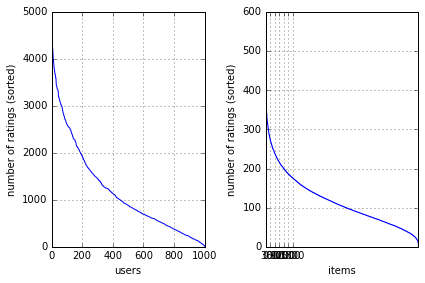

min # of items per user = 8, min # of users per item = 3.


In [3]:
from plots import plot_raw_data

num_items_per_user, num_users_per_item = plot_raw_data(ratings)

print("min # of items per user = {}, min # of users per item = {}.".format(
        min(num_items_per_user), min(num_users_per_item)))

# Ratings distribution

In [4]:
nnz = sp.find(ratings)
items = nnz[0]
users = nnz[1]
rates = nnz[2]

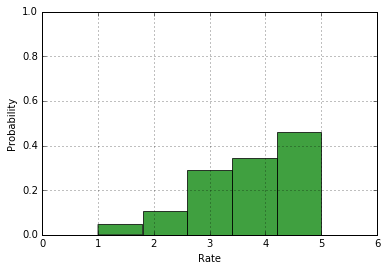

In [5]:
# the histogram of the data
n, bins, patches = plt.hist(rates, 5, normed=1, facecolor='green', alpha=0.75)

plt.xlabel('Rate')
plt.ylabel('Probability')
#plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([0, 6, 0, 1])
plt.grid(True)

plt.show()

We observe that raters mainly give good grades, however this does not provide any useful information about the ratings distribution.

# Analysis per user

We now want to analyse the distribution of the ratings both per items and per user, i.e. observe the distribution of ratings received by the movies as well as the distribution of ratings given by users, and see if we can detect spamers.

In [6]:
ratePerUser = np.zeros(len(np.unique(users))) # mean rate per user (over all movies)
for i,user in enumerate(np.unique(users)):
    ratePerUser[i] = np.mean(rates[users == user])

ratePerMovie = np.zeros(len(np.unique(items))) # mean rate of each movie (over all users)
for i,item in enumerate(np.unique(items)):
    ratePerMovie[i] = np.mean(rates[items == item])
    


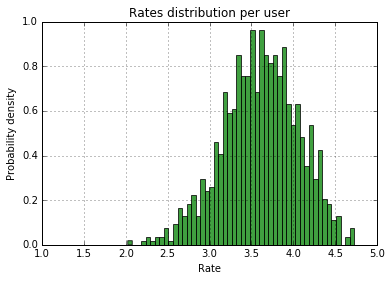

In [7]:
# the histogram of the data
n, bins, patches = plt.hist(ratePerUser, 50, normed=1, facecolor='green', alpha=0.75)

plt.xlabel('Rate')
plt.ylabel('Probability density')
plt.title('Rates distribution per user')
plt.axis([1, 5, 0, 1])
plt.grid(True)

plt.show()

We observe that the ratings distribution per user is rather Gaussian, with a standard deviation of about 1.0 stars.

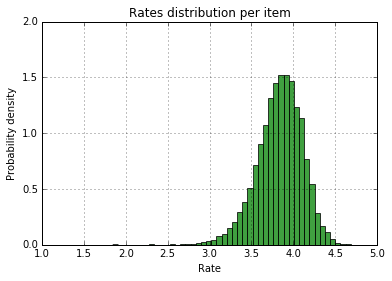

In [8]:
# the histogram of the data
n, bins, patches = plt.hist(ratePerMovie, 50, normed=1, facecolor='green', alpha=0.75)

plt.xlabel('Rate')
plt.ylabel('Probability density')
plt.title('Rates distribution per item')
plt.axis([1, 5, 0,2])
plt.grid(True)

plt.show()

We observe that the ratings distribution per item also follows a Gaussian distribution, but with a standard deviation of about 0.5 stars, thus much lower than the previous distribution per users. The fact that the ratings distribution per item is narrower than the one for users means that most of the information about the ratings given by user to some movie is contained into the user rather than the movie. We thus expect an algorithm such as user mean to be more efficient than item mean.